# **EDA and Formating**

Note: This Notebook only contain the data processing process all the details of the model selection , reasoning etc are in the next two notebooks

**Context on the Dataset**

* The toxicity classification dataset from Kaggle comprises labeled Wikipedia comments, categorized into various types of toxicity, including toxic, severe_toxic, obscene, threat, insult, and identity_hate. This dataset is crucial in the era of social media as it addresses the growing concern of online toxicity. With the rise of digital communication platforms, understanding and predicting the presence of toxic behavior in user-generated content is essential for maintaining a healthy online environment. The classification model developed from this dataset can assist in automating the identification and moderation of harmful content, fostering a safer and more inclusive online community for users.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## train on 10-20 thousand max
train_both = pd.read_csv('train.csv')
train_data, test_data = train_test_split(train_both, test_size=0.2, random_state=42)

print(f"Train set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

Train set shape: (127656, 8)
Test set shape: (31915, 8)


# **Data Imbalance**

* The dataset is highly imbalanced with over 80* of the comments belong to none of the class and even in the rest of the classes there is a huge imbalance

* Over 18,000 of the examples belong ti the Toxic class while on the other hand we have only 470 examples of threat class.

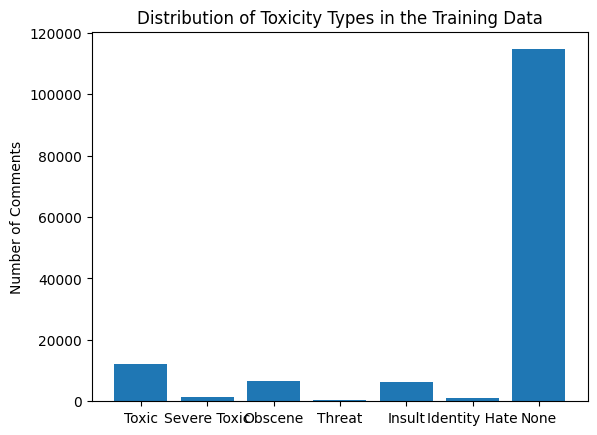

In [ ]:
toxic_train = train_data[train_data['toxic'] == 1]
severe_toxic_train = train_data[train_data['severe_toxic'] == 1]
obscene_train = train_data[train_data['obscene'] == 1]
threat_train = train_data[train_data['threat'] == 1]
insult_train = train_data[train_data['insult'] == 1]
identity_train = train_data[train_data['identity_hate'] == 1]
none_train = train_data[(train_data['identity_hate'] == 0) & (train_data['insult'] == 0) & (train_data['threat'] == 0) &
                        (train_data['obscene'] == 0) & (train_data['severe_toxic'] == 0) & (train_data['toxic'] == 0)]

labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate', 'None']
counts = [toxic_train.shape[0], severe_toxic_train.shape[0], obscene_train.shape[0], threat_train.shape[0], insult_train.shape[0], identity_train.shape[0], none_train.shape[0]]

plt.bar(labels, counts)
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Types in the Training Data')
plt.show()


# **Balancing the dataset**

* Although the dataset is highly imbalanced it represents real world data. That the pattern that we see in the real world.

* However training the model on such unbalanced dataset would lead to bad performance hence it is important to Fine tune the model of relativly balanced dataset.

* Since the fine tuning of LLMs require high computation require really high computation power. Due to lack of computation units we decrease the traning dataset to 7400 examples with relativly balanced distribution. The graph is given below

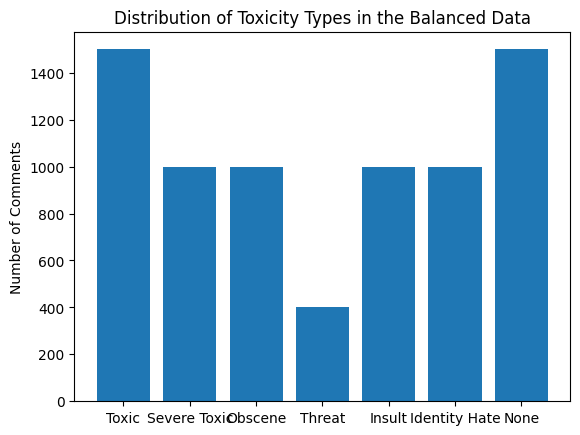

balance_train shape: (7400, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
4698,f8b05b9ae771fb50,"Are all professors of rhetoric pompous, self-c...",1,0,1,0,1,0
5058,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1
7318,2bd4e7d3f2072c25,"Eward, If you have a problem with my edits at ...",0,0,0,0,0,0
169,ad2bb23019f3654b,If you've lived in Fairfield County since colo...,1,0,0,0,0,0
1952,31ca6d8cf326b643,tbjablins comment above \n\nyou dam nazi! go s...,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
5191,6f91db77d5fbb3c3,"Hi will, are you a nigger by any chance? I am ...",0,0,0,0,1,1
5226,11885f5165cbbd4e,FUCK YOURSELVES NAZI MODERATORS,1,0,1,0,1,1
5390,19530efc92f73e1a,"that sock is Mr Putnam alias Khoikhoi, I'm als...",1,0,0,0,0,1
860,a20c40c84c1bb19d,Are you? \n\nAs gay as danski? if you are I wi...,1,0,0,0,1,1


In [ ]:
toxic_train = train_data[train_data['toxic'] == 1].head(1500)
severe_toxic_train = train_data[train_data['severe_toxic'] == 1].head(1000)
obscene_train = train_data[train_data['obscene'] == 1].head(1000)
threat_train = train_data[train_data['threat'] == 1].head(400)
insult_train = train_data[train_data['insult'] == 1].head(1000)
identity_train = train_data[train_data['identity_hate'] == 1].head(1000)
none_train = train_data[(train_data['identity_hate'] == 0) & (train_data['insult'] == 0) & (train_data['threat'] == 0) &
                        (train_data['obscene'] == 0) & (train_data['severe_toxic'] == 0) & (train_data['toxic'] == 0)].head(1500)

balanced_train = pd.concat([toxic_train, severe_toxic_train, obscene_train, threat_train, insult_train, identity_train, none_train])

balanced_train.reset_index(drop=True, inplace=True)

balanced_train = balanced_train.sample(frac=1 , random_state=42)


labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate', 'None']
counts = [toxic_train.shape[0], severe_toxic_train.shape[0], obscene_train.shape[0], threat_train.shape[0], insult_train.shape[0], identity_train.shape[0], none_train.shape[0]]

plt.bar(labels, counts)
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Types in the Balanced Data')
plt.show()


print(f"balance_train shape: {balanced_train.shape}")
balanced_train



# **TESTING DATA**

* The Testing dataset contains 350 samples with 50 belonging to each class while the last 50 belonging to none of the class this is done to insure acurate and fair testing however its important a single example can be multiclass hence 50 examples of toxic does not mean that the entire test data set have 50 classes only that belong to toxic class. The examples from other classes will over lap too

* But by doing so we ensure that the model is  tested on atleast 50 examples of each class

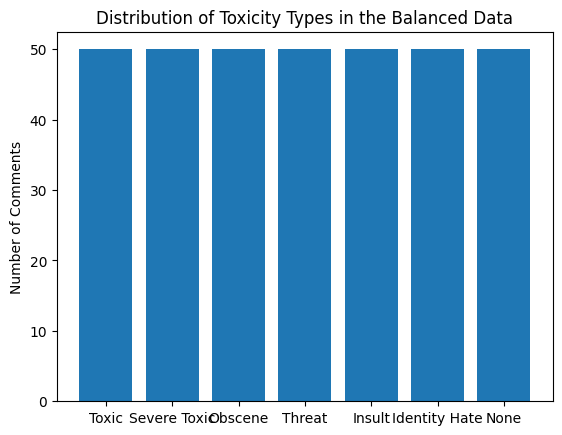

balance_train shape: (7400, 8)
balance_train shape: (350, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
157,f6b5b7d2221a3e4e,"I will flay you alive, you fking stalker. \n\...",1,0,0,1,0,0
341,272dd2597ecc2390,"Once again, leave me alone. You are bothering ...",0,0,0,0,0,0
315,32cfb068392d728e,I see you have such a low self-esteem that you...,0,0,0,0,0,0
234,6a97ff18de2927c5,Your bias has made you say some unbelievably s...,0,0,0,0,1,0
155,73b38c06fae69b1b,EAT CRAP AND DIE!!!!!,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...
71,6b4a8d5f0415cd4d,FUCK YOU YOU FUCKING FAGGOT!!!! this is Sean M...,1,1,1,0,1,1
106,e3b8bc8940f2a818,Oaks and Homophobia\nI provided a full citatio...,1,0,1,0,0,0
270,c92c0eafb496ad7d,Cline is a fucking twat ==\n\n John Cline is g...,1,1,1,0,1,1
348,18d6b2fc90e375e5,True. But then our remarks on this obscure web...,0,0,0,0,0,0


In [ ]:
toxic_test = test_data[test_data['toxic'] == 1].head(50)
severe_toxic_test  = test_data[test_data['severe_toxic'] == 1].head(50)
obscene_test  = test_data[test_data['obscene'] == 1].head(50)
threat_test  = test_data[test_data['threat'] == 1].head(50)
insult_test  = test_data[test_data['insult'] == 1].head(50)
identity_test = test_data[test_data['identity_hate'] == 1].head(50)
none__test  = test_data[(test_data['identity_hate'] == 0) & (test_data['insult'] == 0) & (test_data['threat'] == 0) &
                        (test_data['obscene'] == 0) & (test_data['severe_toxic'] == 0) & (test_data['toxic'] == 0)].head(50)

balanced_test  = pd.concat([toxic_test, severe_toxic_test, obscene_test, threat_test, insult_test, identity_test, none__test])

balanced_test.reset_index(drop=True, inplace=True)

labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate', 'None']
counts = [toxic_test.shape[0], severe_toxic_test.shape[0], obscene_test.shape[0], threat_test.shape[0], insult_test.shape[0], identity_test.shape[0], none__test.shape[0]]

plt.bar(labels, counts)
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Types in the Balanced Data')
plt.show()


print(f"balance_train shape: {balanced_train.shape}")
balanced_train

print(f"balance_test shape: {balanced_test.shape}")

balanced_test  = balanced_test.sample(frac=1 , random_state=42)
balanced_test

# **Actual distribution of Testing data considering classoverlap**

291 84 233 55 225 80 50


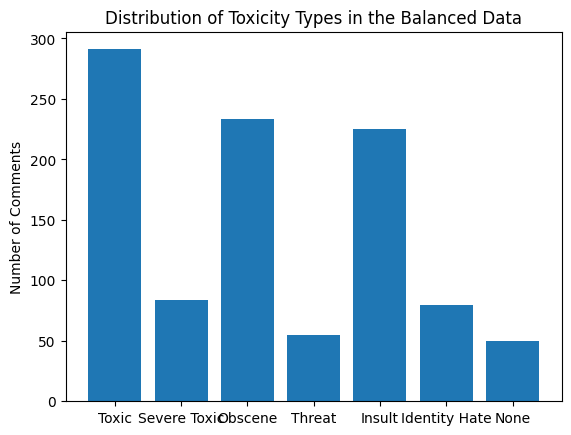

In [ ]:
toxic_test = balanced_test[balanced_test['toxic'] == 1]
severe_toxic_test  = balanced_test[balanced_test['severe_toxic'] == 1]
obscene_test  = balanced_test[balanced_test['obscene'] == 1]
threat_test  = balanced_test[balanced_test['threat'] == 1]
insult_test  = balanced_test[balanced_test['insult'] == 1]
identity_test = balanced_test[balanced_test['identity_hate'] == 1]
none__test  = balanced_test[(balanced_test['identity_hate'] == 0) & (balanced_test['insult'] == 0) & (balanced_test['threat'] == 0) &
                        (balanced_test['obscene'] == 0) & (balanced_test['severe_toxic'] == 0) & (balanced_test['toxic'] == 0)]
print(toxic_test.shape[0] , severe_toxic_test.shape[0], obscene_test.shape[0] , threat_test.shape[0] , insult_test.shape[0] , identity_test.shape[0] , none__test.shape[0])


labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate', 'None']
counts = [toxic_test.shape[0], severe_toxic_test.shape[0], obscene_test.shape[0], threat_test.shape[0], insult_test.shape[0], identity_test.shape[0], none__test.shape[0]]

plt.bar(labels, counts)
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Types in the Balanced Data')
plt.show()


# **Formating of Train and Test Data**

* There are multiple ways to format the model text Stanford alpacha LLAMA-2 fine tuning use User , Assistant model with the following format

    User : "Why am i doing this"

    
    Assistant : "I don't know why you're doing this; it's like trying to understand why cats sit on your laptop or why socks disappear in the laundry. Life's mysteries are as baffling as a giraffe trying to limbo. Perhaps in the grand cosmic dance, your actions are the cha-cha slide of destiny—unpredictable, occasionally awkward, but undeniably entertaining for the universe. So, my friend, waltz through the absurdity and foxtrot through the uncertainty, for in the rhythm of not knowing, you might just find the hilarious tango of existence."


* However in our case we use the [INST] parser method. This is because Ollama use the same format for Zero Shot and Multishot testing. Our text has the following format


    " [INST] But seriously, why does the universe seem to have such a quirky playlist for my life?[/INST]

    "(start of sentnce marker not printing here) Ah, the cosmic DJ is probably taking requests in the form of shooting stars and dandelion wishes. Imagine the universe as a karaoke bar, and you're just belting out the ballad of your existence while intergalactic patrons nod along with their invisible glowstick wands. So, what's your next song request for the celestial jukebox? (end of sentence marker)"

In [ ]:
balanced_train['text'] = ""

for index, row in balanced_train.iterrows():

    if index % 1000 == 0:
        print("Index = "  , index)

    text = row[1]
    prompt = f"""Recognize the Sentiment Polarity of the Class. Given the Classes determine weather the text belong to the class or not. If the text belongs to the class assign the class 1 else 0. Here are the classes : [Toxic, Severaly toxic, Obscene, Threat, Insult, Identity Hate]Here is the text : {text} .Do not try to expalin the or print any thing other else just give the answer in the following format
Answer Fomat :
Toxic : class_value
Severaly toxic : class_value
Obscene: class_value
Threat: class_value
Insult: class_value
Identity Hate: class_value"""

    Toxic_value = row[2]
    Severe_Toxic_value = row[3]
    Obscene_value = row[4]
    Threat_value = row[5]
    Insult_value = row[6]
    Identity_hate_value = row[7]

    answer = f"""Toxic : {Toxic_value}
Severaly toxic : {Severe_Toxic_value}
Obscene: {Obscene_value}
Threat: {Threat_value}
Insult: {Insult_value}
Identity Hate: {Identity_hate_value}"""

    Input=  f'<s>[INST]{prompt}[/INST] {answer}</s>'

    balanced_train["text"][index] = Input



balanced_train = balanced_train
print("\n\nTraining Example" , balanced_train["text"][0],"\n\n")

/var/folders/xz/dk1hypw10cn9q9z2bptq0f9h0000gn/T/ipykernel_83185/2170566146.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_train["text"][index] = Input


Index =  3000
Index =  0
Index =  7000
Index =  1000
Index =  6000
Index =  5000
Index =  2000
Index =  4000


Training Example <s>[INST]Recognize the Sentiment Polarity of the Class. Given the Classes determine weather the text belong to the class or not. If the text belongs to the class assign the class 1 else 0. Here are the classes : [Toxic, Severaly toxic, Obscene, Threat, Insult, Identity Hate]Here is the text : Grandma Terri Should Burn in Trash 
Grandma Terri is trash. I hate Grandma Terri. F%%K her to HELL! 71.74.76.40 .Do not try to expalin the or print any thing other else just give the answer in the following format 
Answer Fomat : 
Toxic : class_value 
Severaly toxic : class_value 
Obscene: class_value 
Threat: class_value 
Insult: class_value 
Identity Hate: class_value[/INST] Toxic : 1
Severaly toxic : 0
Obscene: 0
Threat: 0
Insult: 0
Identity Hate: 0</s> 




In [ ]:
balanced_train = balanced_train.sample(frac=1).reset_index(drop=True)
# display(thousand_data)
# text = thousand_data[['text']]
# text_df = pd.DataFrame(text)

text = balanced_train[['text']].copy(deep=True)
# display(text['text'][0])

text_df = pd.DataFrame(text)
text_df['text'] = text_df['text'].replace({'\'': '', '\"': ''}, regex=True)

display(text_df)
# text_df = text_df.in
text_df.to_csv('Model_data.csv')


,text
0,<s>[INST]Recognize the Sentiment Polarity of t...
1,<s>[INST]Recognize the Sentiment Polarity of t...
2,<s>[INST]Recognize the Sentiment Polarity of t...
3,<s>[INST]Recognize the Sentiment Polarity of t...
4,<s>[INST]Recognize the Sentiment Polarity of t...
...,...
7395,<s>[INST]Recognize the Sentiment Polarity of t...
7396,<s>[INST]Recognize the Sentiment Polarity of t...
7397,<s>[INST]Recognize the Sentiment Polarity of t...
7398,<s>[INST]Recognize the Sentiment Polarity of t...


In [ ]:
balanced_test['text'] = ""

for index, row in balanced_test.iterrows():

    if index % 100 == 0:
        print("Index = "  , index)

    text = row[1]
    prompt = f"""Recognize the Sentiment Polarity of the Class. Given the Classes determine weather the text belong to the class or not. If the text belongs to the class assign the class 1 else 0. Here are the classes : [Toxic, Severaly toxic, Obscene, Threat, Insult, Identity Hate]Here is the text : {text} .Do not try to expalin the or print any thing other else just give the answer in the following format
Answer Fomat :
Toxic : class_value
Severaly toxic : class_value
Obscene: class_value
Threat: class_value
Insult: class_value
Identity Hate: class_value"""


    Input=  f'<s>[INST]{prompt}[/INST]'
    balanced_test["text"][index] = Input



balanced_test = balanced_test
balanced_test

Index =  0
Index =  100
Index =  300
Index =  200


/var/folders/xz/dk1hypw10cn9q9z2bptq0f9h0000gn/T/ipykernel_61741/2779048730.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_test["text"][index] = Input


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text
157,f6b5b7d2221a3e4e,"I will flay you alive, you fking stalker. \n\...",1,0,0,1,0,0,<s>[INST]Recognize the Sentiment Polarity of t...
341,272dd2597ecc2390,"Once again, leave me alone. You are bothering ...",0,0,0,0,0,0,<s>[INST]Recognize the Sentiment Polarity of t...
315,32cfb068392d728e,I see you have such a low self-esteem that you...,0,0,0,0,0,0,<s>[INST]Recognize the Sentiment Polarity of t...
234,6a97ff18de2927c5,Your bias has made you say some unbelievably s...,0,0,0,0,1,0,<s>[INST]Recognize the Sentiment Polarity of t...
155,73b38c06fae69b1b,EAT CRAP AND DIE!!!!!,1,0,1,1,1,0,<s>[INST]Recognize the Sentiment Polarity of t...
...,...,...,...,...,...,...,...,...,...
71,6b4a8d5f0415cd4d,FUCK YOU YOU FUCKING FAGGOT!!!! this is Sean M...,1,1,1,0,1,1,<s>[INST]Recognize the Sentiment Polarity of t...
106,e3b8bc8940f2a818,Oaks and Homophobia\nI provided a full citatio...,1,0,1,0,0,0,<s>[INST]Recognize the Sentiment Polarity of t...
270,c92c0eafb496ad7d,Cline is a fucking twat ==\n\n John Cline is g...,1,1,1,0,1,1,<s>[INST]Recognize the Sentiment Polarity of t...
348,18d6b2fc90e375e5,True. But then our remarks on this obscure web...,0,0,0,0,0,0,<s>[INST]Recognize the Sentiment Polarity of t...


# **Saving the processed Train and Test Datasets**

In [ ]:
balanced_test = balanced_test.sample(frac=1).reset_index(drop=True)
balanced_test.to_csv("test_lables.csv")
# display(thousand_data)
# text = thousand_data[['text']]
# text_df = pd.DataFrame(text)

text = balanced_test[['text']].copy(deep=True)
# display(text['text'][0])

text_df = pd.DataFrame(text)
text_df['text'] = text_df['text'].replace({'\'': '', '\"': ''}, regex=True)

display(text_df)
# text_df = text_df.in
text_df.to_csv('test_data.csv')

,text
0,<s>[INST]Recognize the Sentiment Polarity of t...
1,<s>[INST]Recognize the Sentiment Polarity of t...
2,<s>[INST]Recognize the Sentiment Polarity of t...
3,<s>[INST]Recognize the Sentiment Polarity of t...
4,<s>[INST]Recognize the Sentiment Polarity of t...
...,...
345,<s>[INST]Recognize the Sentiment Polarity of t...
346,<s>[INST]Recognize the Sentiment Polarity of t...
347,<s>[INST]Recognize the Sentiment Polarity of t...
348,<s>[INST]Recognize the Sentiment Polarity of t...
